In [36]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################



directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 

vdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
vdatadirectory=directory+"/data/voldata.csv"

voldata = pd.read_csv(vdatadirectory)
voldata = voldata.replace(np.nan, '', regex=True) 


svdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
svdatadirectory=directory+"/data/swaptionvol.csv"

svoldata = pd.read_csv(svdatadirectory)
svoldata = svoldata.replace(np.nan, '', regex=True) 

In [37]:
vol_dict=voldata.to_dict('r')
svol_dict=svoldata.to_dict('r')
nvol_dict=vol_dict+svol_dict

In [38]:
optionDefinition={}
volatility={}
optionDefinition["underlying"]="USD"
optionDefinition["currency"]="TRY"
optionDefinition["callPut"]="Call"
optionDefinition["exerciseType"]="European"
optionDefinition["longShort"]="Long"
optionDefinition["strike"]=7.81
optionDefinition["underlyingPrice"]=7.3406
optionDefinition["processType"]="GeneralizedBS"
optionDefinition["method"]="Analytic"
optionDefinition["calendar"]="Turkey"
optionDefinition["businessDayConvention"]="ModifiedFollowing"
optionDefinition["dayCounter"]="Actual360"
optionDefinition["optionStartDate"]="2021-03-17"
optionDefinition["optionEndDate"]="2021-06-17"
optionDefinition["timeSteps"]=800
optionDefinition["timeGrid"]=10
optionDefinition["contractSize"]=1
optionDefinition["spotAdjustment"]=1
volatility["bidask"]="mid"
volatility["delta"]="25Delta"
volatility["businessDayConvention"]="Following"
optionDefinition["volatility"]=volatility
optionDefinition["interestRate"]="FXTRYZC"
optionDefinition["riskFreeRate"]= "FXUSDZC" 

optionDefinition

{'underlying': 'USD',
 'currency': 'TRY',
 'callPut': 'Call',
 'exerciseType': 'European',
 'longShort': 'Long',
 'strike': 7.81,
 'underlyingPrice': 7.3406,
 'processType': 'GeneralizedBS',
 'method': 'Analytic',
 'calendar': 'Turkey',
 'businessDayConvention': 'ModifiedFollowing',
 'dayCounter': 'Actual360',
 'optionStartDate': '2021-03-17',
 'optionEndDate': '2021-06-17',
 'timeSteps': 800,
 'timeGrid': 10,
 'contractSize': 1,
 'spotAdjustment': 1,
 'volatility': {'bidask': 'mid',
  'delta': '25Delta',
  'businessDayConvention': 'Following'},
 'interestRate': 'FXTRYZC',
 'riskFreeRate': 'FXUSDZC'}

In [39]:
instruments={}
depo={}

depo["businessDayConvention"]="ModifiedFollowing"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

instruments["DEPO"]=depo

instruments

{'DEPO': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360'}}

In [40]:
interestRate={
      "name": "FXTRYZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments
    }
interestRate

{'name': 'FXTRYZC',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'}}}

In [41]:
 riskFreeRate= {
      "name": "FXUSDZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "USD",
      "calendar": "UnitedStates",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments":instruments
    }
riskFreeRate

{'name': 'FXUSDZC',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'}}}

In [42]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "VaR",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "TRY",
  "horizon": 252,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y","5Y",
                 "6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "confidenceInterval": 0.99,
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "riskMethod": "MONTECARLO",
  "calibration": True,
  "correlation": False,
  "nPath": 1000,
  "nDayVar": 2,
  "alpha": 0.376739,
  "sigma": 0.0209835,
  "tasks": [
    {
      "trade_id": "VOP1001",
      "calculation_type": "vanilla_option",
      "settlementDate": "2021-02-01",
      "maturityDate": "2021-06-28",
      "notional": 1000000,
      "optionDefinition": optionDefinition
    }
  ],
  "curves": [interestRate,riskFreeRate],
  "yieldData": yielddata.to_dict('r'),
  "volatilityData": nvol_dict,
  "marketData":marketdata.to_dict('r'),
}

In [43]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [44]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['VAR', result.get('VaR')])
npvTable.add_row(['VAR/PV (%)', result.get('var/pv')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)

+------------+-------------+
| Parameters |       Value |
+------------+-------------+
|         PV | 173883.9387 |
|        VAR | 110124.5091 |
| VAR/PV (%) |     63.3322 |
+------------+-------------+


In [45]:
vop=pd.DataFrame(result.get("portfolioPv"))
vop=vop.iloc[:,1:riskdata.get("nDayVar")]


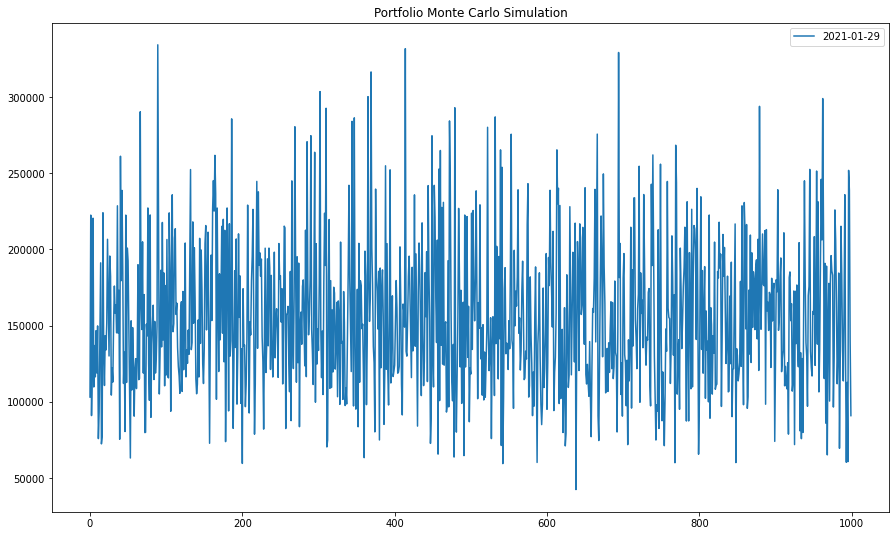

In [46]:
vop.plot(figsize=(15,9)); 
plt.title("Portfolio Monte Carlo Simulation")
plt.legend(loc='best')
plt.show()

In [49]:
vop.quantile(q=0.01, axis=0)-result.get('pv')

2021-01-29   -110124.50906
Name: 0.01, dtype: float64